# 2024 날씨 빅데이터 콘테스트 

## 전력 분야 - 기상에 따른 공동주택 전력수요 예측 개선 

In [1]:
import pandas as pd
import os 

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('./data/electric_train_cp949.csv', encoding='cp949', index_col=0)
df['electric_train.tm'] = pd.to_datetime(df['electric_train.tm'])

print(df.shape)

(7593355, 16)


In [3]:
elec_cols = ['electric_train.'+ a for a in ['tm', 'hh24', 'weekday', 'week_name', 'sum_qctr', 'n', 'sum_load', 'n_mean_load', 'elec']]
df_elec = df[elec_cols]
df_elec.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73


In [4]:
weat_cols = ['electric_train.'+ a for a in ['num', 'stn', 'nph_ta', 'nph_hm', 'nph_ws_10m', 'nph_rn_60m', 'nph_ta_chi']]
df_weat = df[weat_cols]
df_weat.head()

,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
1,4821,884,2.2,62.7,1.8,0.0,-1.0
2,4821,884,2.3,63.1,2.1,0.0,-0.6
3,4821,884,2.2,62.4,2.5,0.0,-1.3
4,4821,884,1.7,63.5,1.7,0.0,-0.2
5,4821,884,1.7,63.0,1.6,0.0,-0.8


In [5]:
reset_order_cols = elec_cols + weat_cols

df_new = df[reset_order_cols]

df_new.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
1,2021-01-01 01:00:00,1,4,0,6950,11,751.32,68.606449,99.56,4821,884,2.2,62.7,1.8,0.0,-1.0
2,2021-01-01 02:00:00,2,4,0,6950,11,692.60,68.606449,91.78,4821,884,2.3,63.1,2.1,0.0,-0.6
3,2021-01-01 03:00:00,3,4,0,6950,11,597.48,68.606449,79.17,4821,884,2.2,62.4,2.5,0.0,-1.3
4,2021-01-01 04:00:00,4,4,0,6950,11,553.48,68.606449,73.34,4821,884,1.7,63.5,1.7,0.0,-0.2
5,2021-01-01 05:00:00,5,4,0,6950,11,526.24,68.606449,69.73,4821,884,1.7,63.0,1.6,0.0,-0.8


In [9]:
df_new['electric_train.stn'].unique()

array([884, 184, 330, 261, 168, 165, 774, 162, 294, 313, 712, 713, 266,
       907, 710, 788, 917, 950, 708, 722, 908, 904, 159, 942, 783, 156,
       192, 155, 938, 937, 974, 899, 255, 253, 941, 940, 252, 923, 673,
       939, 257, 247, 288, 245, 898, 901, 900, 152, 284, 943, 737, 864,
       146, 846, 827, 991, 860, 143, 283, 702, 840, 811, 140, 845, 281,
       138, 279, 825, 824, 822, 615, 605, 636, 642, 235, 133, 643, 137,
       612, 496, 494, 611, 131, 327, 273, 136, 177, 628, 693, 627, 129,
       493, 617, 837, 616, 600, 472, 358, 551, 495, 127, 516, 471, 432,
       446, 550, 221, 571, 119, 216, 371, 436, 549, 203, 545, 445, 430,
       533, 548, 565, 438, 364, 459, 114, 512, 377, 434, 590, 572, 546,
       112, 492, 649, 376, 509, 543, 433, 423, 417, 410, 889, 401, 400,
       403, 202, 876, 511, 404, 405, 418, 415, 421, 413, 402, 428, 441,
       412, 108, 408, 409, 569, 106, 570, 427, 450, 540, 416, 414, 424,
       407, 541, 589, 406, 484, 506, 532, 599, 373, 353, 104, 52

In [10]:
print(len(df_new['electric_train.stn'].unique()))

185


### Train과 val을 먼저 나누지 말고 년도별로 나눠보자 

In [6]:
df_2020 = df_new[df_new['electric_train.tm'].dt.year == 2020]
df_2021 = df_new[df_new['electric_train.tm'].dt.year == 2021]
df_2022 = df_new[df_new['electric_train.tm'].dt.year == 2022]
df_2023 = df_new[df_new['electric_train.tm'].dt.year == 2023]

df_2020.reset_index(drop=True, inplace=True)
df_2021.reset_index(drop=True, inplace=True)
df_2022.reset_index(drop=True, inplace=True)
df_2023.reset_index(drop=True, inplace=True)


In [11]:
df_2020.head()

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
0,2020-01-01 01:00:00,1,2,0,42250,58,4468.72,79.776051,96.58,5565,184,2.3,65.8,1.7,0.0,-0.3
1,2020-01-01 02:00:00,2,2,0,42250,58,4101.00,79.776051,88.63,5565,184,2.5,69.7,1.8,0.0,-0.2
2,2020-01-01 03:00:00,3,2,0,42250,58,3724.60,79.776051,80.50,5565,184,2.8,69.5,2.3,0.0,-0.2
3,2020-01-01 04:00:00,4,2,0,42250,58,3484.40,79.776051,75.31,5565,184,2.8,66.0,1.6,0.0,0.5
4,2020-01-01 05:00:00,5,2,0,42250,58,3409.12,79.776051,73.68,5565,184,3.0,66.1,1.6,0.0,0.5


In [18]:
# AWS 지점 번호 -> 즉, 측정위치?
spots = df_2020['electric_train.stn'].unique().tolist()
spots[:10]

[184, 330, 165, 774, 168, 162, 294, 313, 712, 713]

In [20]:
df_2020[df_2020['electric_train.stn']==spots[0]]

,electric_train.tm,electric_train.hh24,electric_train.weekday,electric_train.week_name,electric_train.sum_qctr,electric_train.n,electric_train.sum_load,electric_train.n_mean_load,electric_train.elec,electric_train.num,electric_train.stn,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi
0,2020-01-01 01:00:00,1,2,0,42250,58,4468.72,79.776051,96.58,5565,184,2.3,65.8,1.7,0.0,-0.3
1,2020-01-01 02:00:00,2,2,0,42250,58,4101.00,79.776051,88.63,5565,184,2.5,69.7,1.8,0.0,-0.2
2,2020-01-01 03:00:00,3,2,0,42250,58,3724.60,79.776051,80.50,5565,184,2.8,69.5,2.3,0.0,-0.2
3,2020-01-01 04:00:00,4,2,0,42250,58,3484.40,79.776051,75.31,5565,184,2.8,66.0,1.6,0.0,0.5
4,2020-01-01 05:00:00,5,2,0,42250,58,3409.12,79.776051,73.68,5565,184,3.0,66.1,1.6,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17561,2020-12-31 19:00:00,19,3,0,16750,19,2722.28,97.138634,147.50,5566,184,4.0,55.2,6.7,0.0,-0.8
17562,2020-12-31 20:00:00,20,3,0,16750,19,2727.80,97.138634,147.80,5566,184,4.1,57.3,6.2,0.0,-0.5
17563,2020-12-31 21:00:00,21,3,0,16750,19,2584.72,97.138634,140.05,5566,184,4.2,56.4,6.9,0.0,-0.7
17564,2020-12-31 22:00:00,22,3,0,16750,19,2671.16,97.138634,144.73,5566,184,4.2,56.9,6.0,0.0,-0.4


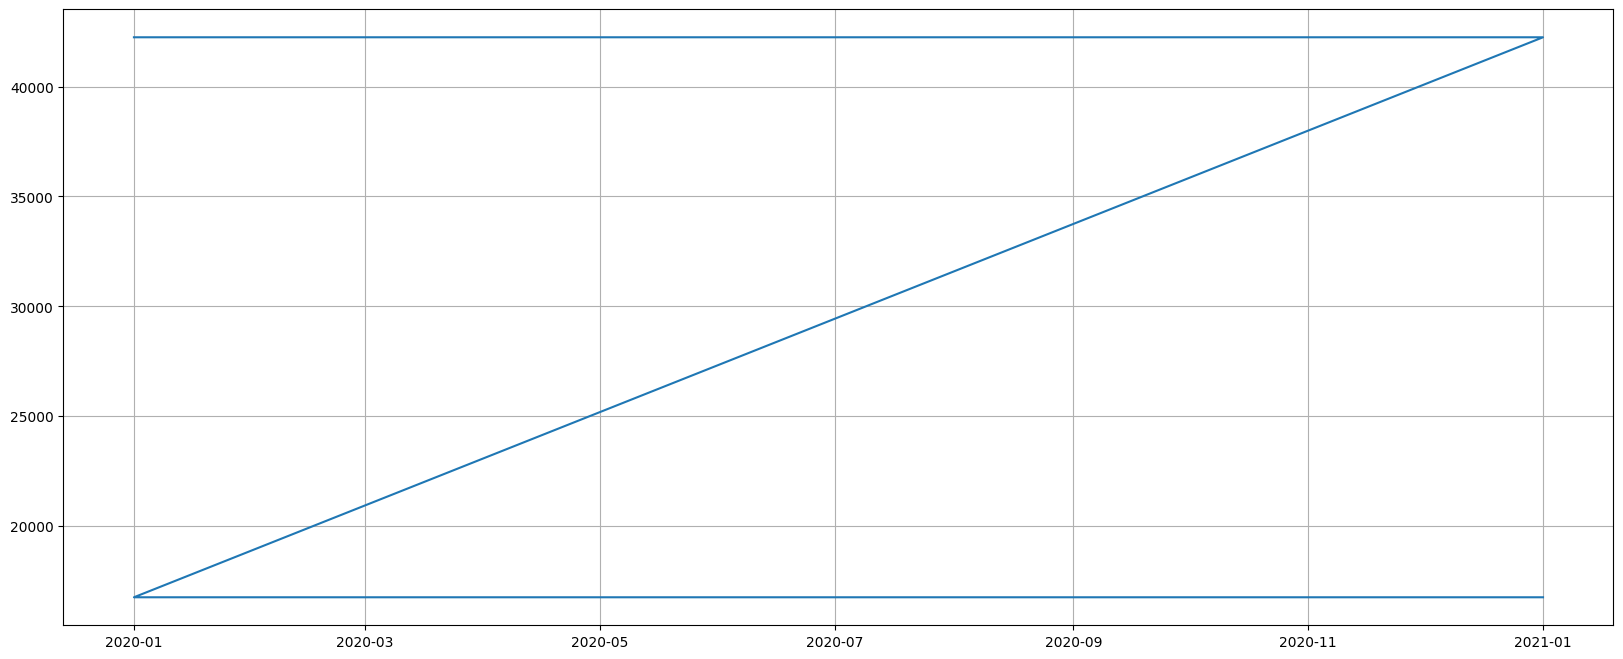

In [21]:
plt.figure(figsize = (20,8))
plt.plot('electric_train.tm', 'electric_train.sum_qctr', data = df_2020[df_2020['electric_train.stn']==spots[0]])
plt.grid()
plt.show()